# VISUALIZATION:

In [1]:
import pandas as pd
import numpy as np
import csv
import re
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

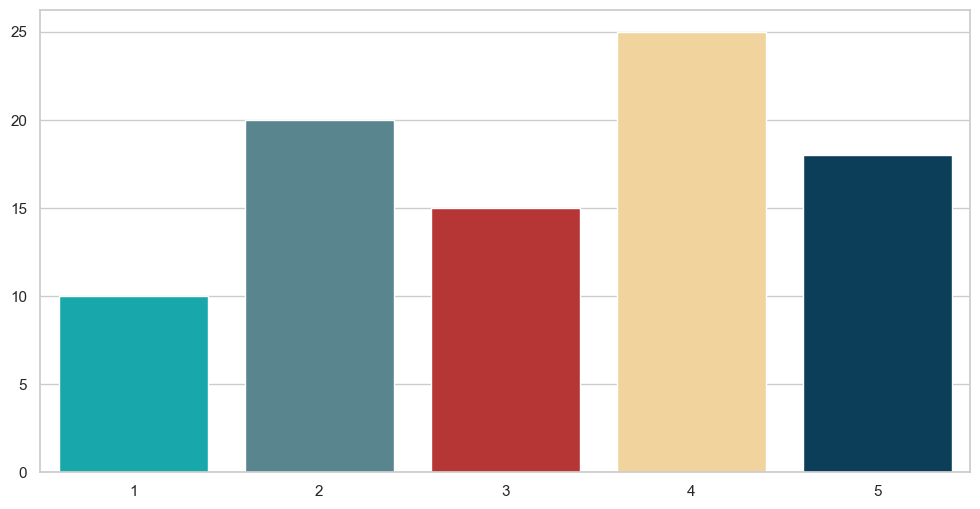

In [4]:
# Definir la paleta de colores con tonalidad más homogénea
rock_palette = ["#004266", "#FFD98F", "#CC1F1F", "#4F8B97", "#00BFC3"]

# Invierte los colores de la paleta
inverted_palette = list(reversed(rock_palette))
# Crear un gráfico de ejemplo
sns.set(style="whitegrid")
sns.barplot(x=[1, 2, 3, 4, 5], y=[10, 20, 15, 25, 18], palette=inverted_palette)
plt.savefig('images/pallete.png')
# Mostrar el gráfico
plt.show()

### Import DataFrames

In [5]:
df_s = pd.read_csv("data/vintage_shop_items.csv")
df_a = pd.read_csv("data/album_rating.csv")

1. Pricing by decade:
    - witch is the average price of an t-shirt
    - average price by decade
    - Products of X decade are more spensibe than 

In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  3737 non-null   object 
 1   price_$      3737 non-null   float64
 2   decade       3737 non-null   int64  
 3   tag          1319 non-null   object 
 4   cat          1319 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 146.1+ KB


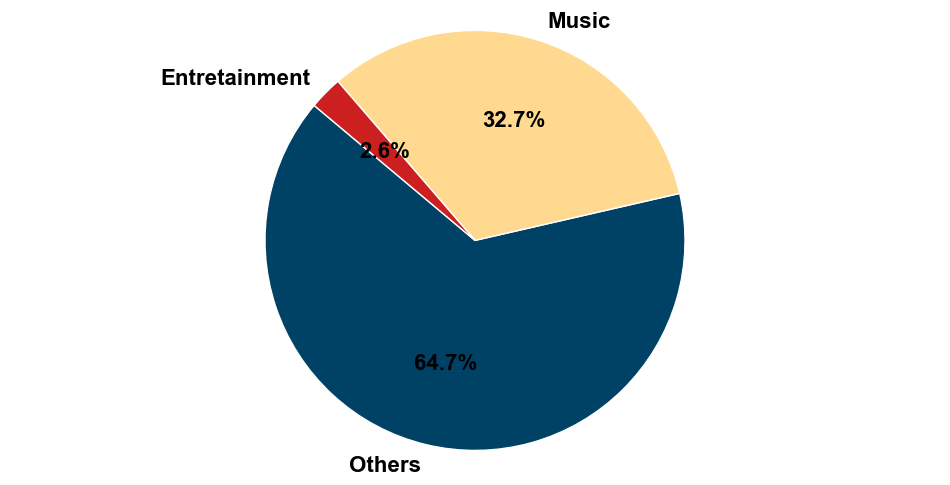

In [9]:
df_category = df_s["cat"].fillna("Others").value_counts()

plt.pie(df_category, labels=df_category.index, autopct='%1.1f%%', 
        startangle=140, colors=rock_palette,
        textprops={'fontsize': 16, 'color': 'black', 'weight': 'bold'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('')
plt.savefig('images/pie_char_category.png')
plt.show()

### SHOW OTHERS ?¿? There is not just those

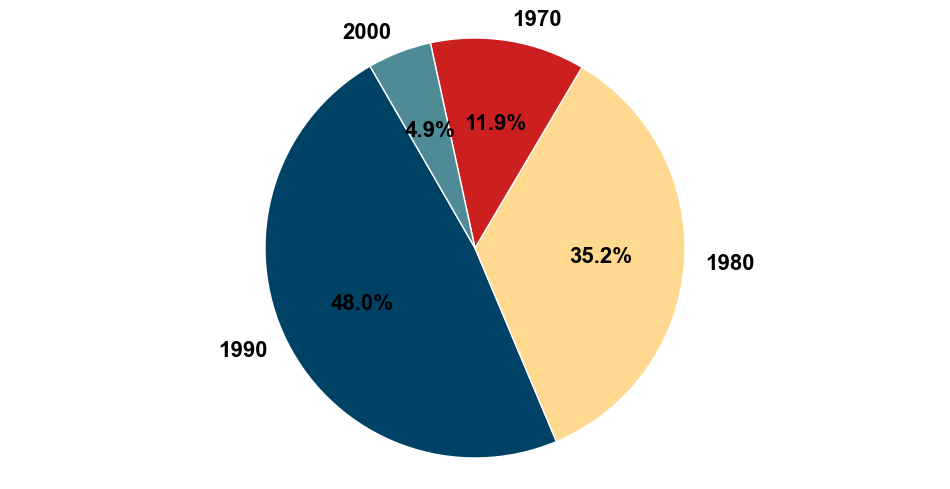

In [10]:
#most common decades
decade_counts = df_s[df_s["decade"] != 1960]["decade"].value_counts()

plt.pie(decade_counts, labels=decade_counts.index, autopct='%1.1f%%', 
        startangle=120, colors=rock_palette, 
        textprops={'fontsize': 16, 'color': 'black', 'weight': 'bold'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('')
plt.savefig('images/pie-char_decade.png')
plt.show()

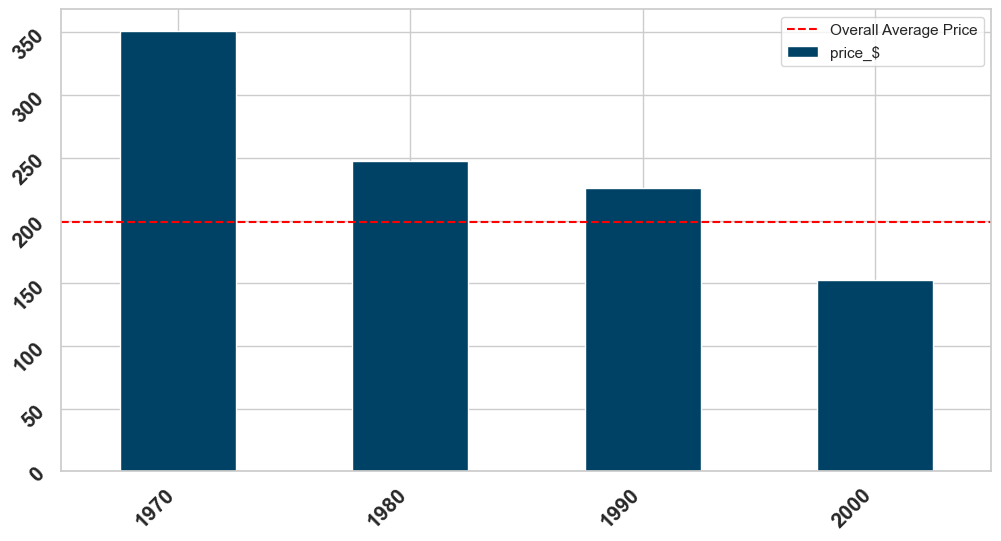

In [11]:
df_music = df_s.query('cat == "Music"')

# Average price by decade
decade_avg_price = pd.DataFrame(df_music.groupby(["decade"])['price_$'].mean())
overall_avg_price = df_s['price_$'].mean()

# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = decade_avg_price.plot(kind='bar', color=rock_palette[0])
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=overall_avg_price, color='red', linestyle='--', label='Overall Average Price')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')

plt.savefig('images/bar_char_decade.png')

plt.legend()  # Show legend
plt.show()

In [13]:
group_avg_price = pd.DataFrame(df_music.groupby(["tag"])['price_$'].mean())
group_avg_price = group_avg_price.sort_values(by='price_$', ascending=False)
group_avg_price.tail(5)
group_avg_price.head(5)

,price_$
tag,
Iron Maiden,426.817308
Nine Inch Nails,421.428571
Bob Dylan,390.000000
The Clash,376.666667
Type O Negative,341.666667


In [14]:
avg_group_table = pd.concat([group_avg_price.head(5), group_avg_price.tail(5)])
avg_group_table

,price_$
tag,
Iron Maiden,426.817308
Nine Inch Nails,421.428571
Bob Dylan,390.000000
The Clash,376.666667
Type O Negative,341.666667
Bob Seger,151.666667
Poison,125.000000
311,121.250000
Garth Brooks,119.642857


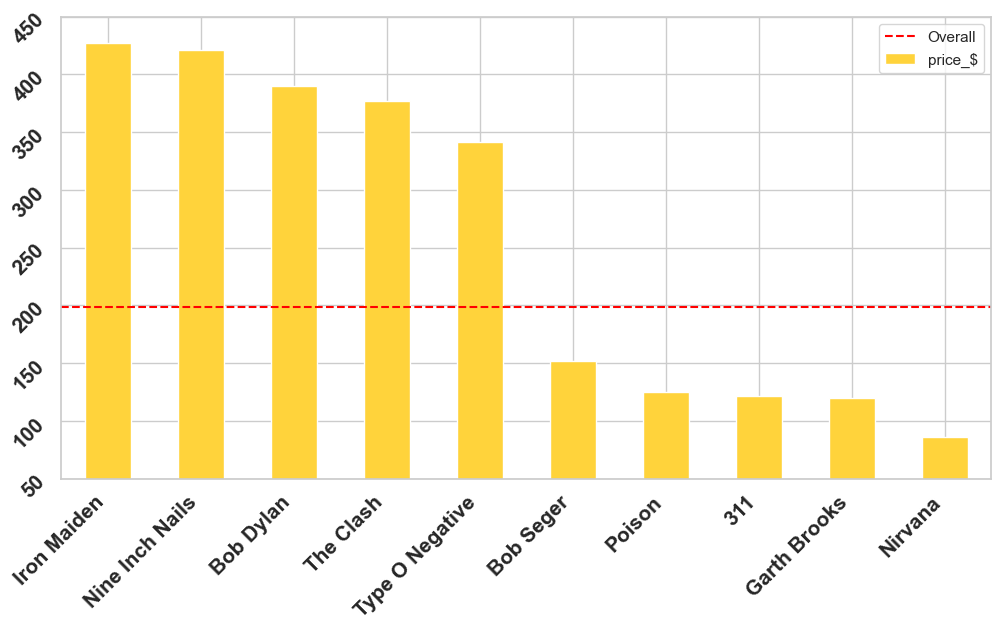

In [15]:
# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = avg_group_table.plot(kind='bar', color="#FFD33B")
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=overall_avg_price, color='red', linestyle='--', label='Overall')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')

"""
# Set a specific color for the "Nirvana" bar
nirvana_index = avg_group_table.index.get_loc("Nirvana")
ax.patches[nirvana_index].set_facecolor("#FF2273") 

ton_index = avg_group_table.index.get_loc("Type O Negative")
ax.patches[ton_index].set_facecolor("#5CE1E6")

bob_index = avg_group_table.index.get_loc("Bob Dylan")
ax.patches[bob_index].set_facecolor("#004266") 

#["#004266", "#FFD98F", "#CC1F1F", "#4F8B97", "#00BFC3"]

"""

plt.savefig('images/bar_char_top&tail_price_artist.png')

plt.ylim(50, 450)  # Adjust the range as needed
plt.legend()  # Show legend
plt.show()

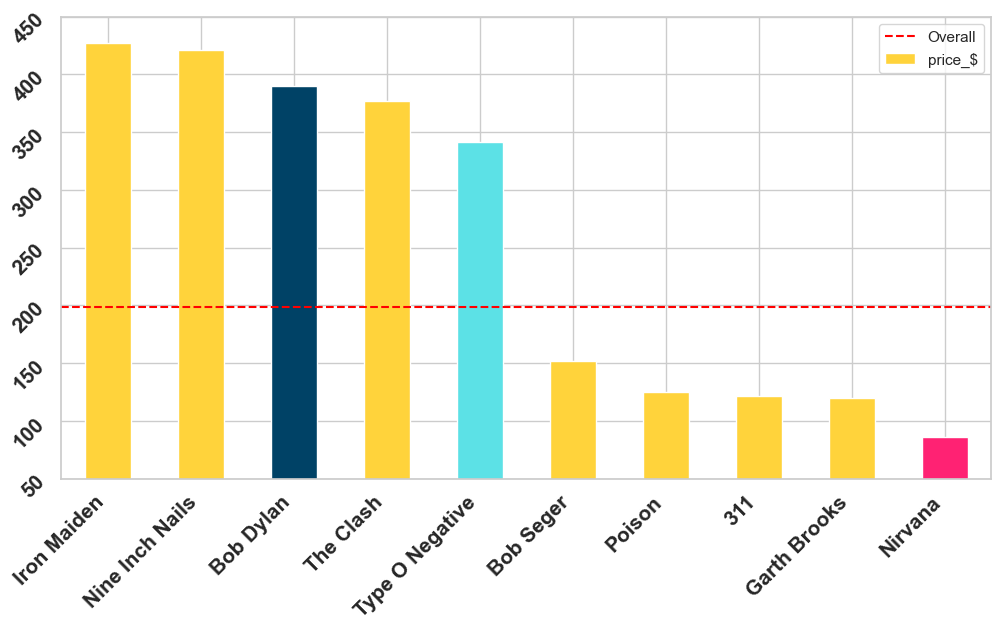

In [17]:
# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = avg_group_table.plot(kind='bar', color="#FFD33B")
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=overall_avg_price, color='red', linestyle='--', label='Overall')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')


# Set a specific color for the "Nirvana" bar
nirvana_index = avg_group_table.index.get_loc("Nirvana")
ax.patches[nirvana_index].set_facecolor("#FF2273") 

ton_index = avg_group_table.index.get_loc("Type O Negative")
ax.patches[ton_index].set_facecolor("#5CE1E6")

bob_index = avg_group_table.index.get_loc("Bob Dylan")
ax.patches[bob_index].set_facecolor("#004266") 

#["#004266", "#FFD98F", "#CC1F1F", "#4F8B97", "#00BFC3"]


plt.savefig('images/bar_char_top&tail_price_artist_color.png')

plt.ylim(50, 450)  # Adjust the range as needed
plt.legend()  # Show legend
plt.show()

In [18]:
comon_artist = pd.DataFrame(df_music['tag'].value_counts())
#mean = comon_artist.mean()
#comon_artist
#mean
artist_group_table = pd.concat([comon_artist.head(5), comon_artist.tail(5)])
artist_group_table

,count
tag,
Grateful Dead,116
Rolling Stones,97
Metallica,53
Guns N Roses,47
Pink Floyd,47
Smashing Pumpkins,7
Nirvana,6
Type O Negative,6
Green Day,5


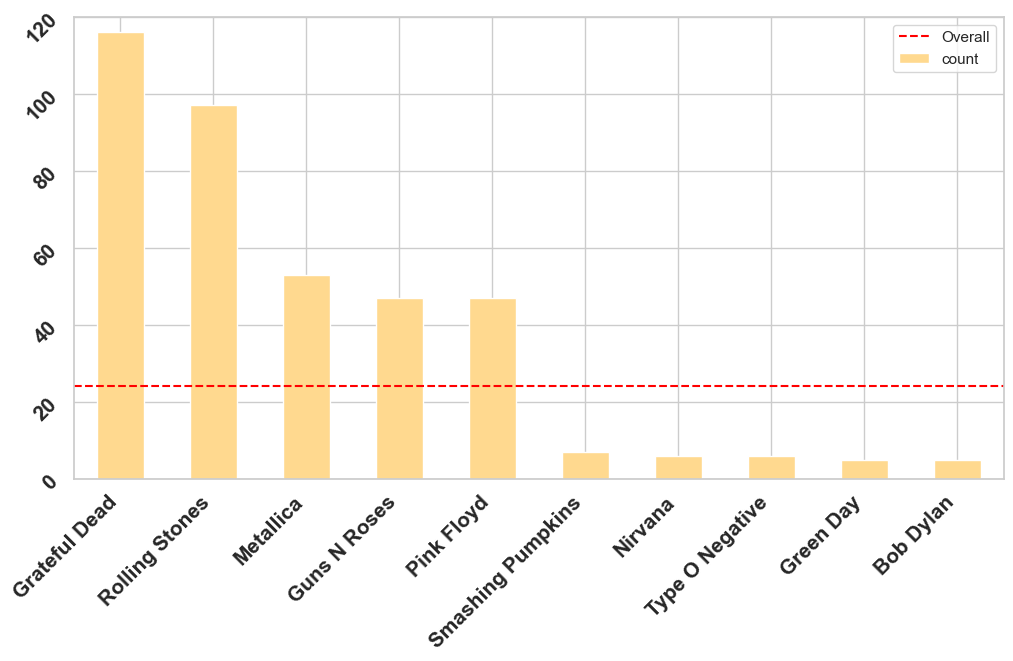

In [20]:
# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = artist_group_table.plot(kind='bar', color=rock_palette[1])
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=24, color='red', linestyle='--', label='Overall')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')


"""
nirvana_index = artist_group_table.index.get_loc("Nirvana")
ax.patches[nirvana_index].set_facecolor("#FF2273") 

ton_index = artist_group_table.index.get_loc("Type O Negative")
ax.patches[ton_index].set_facecolor("#5CE1E6") 

bob_index = artist_group_table.index.get_loc("Bob Dylan")
ax.patches[bob_index].set_facecolor("#004266") 

"""

plt.ylim(0, 120)  # Adjust the range as needed
plt.legend()  # Show legend
plt.savefig('images/bar_char_top&tail_avail_artist.png')
plt.show()

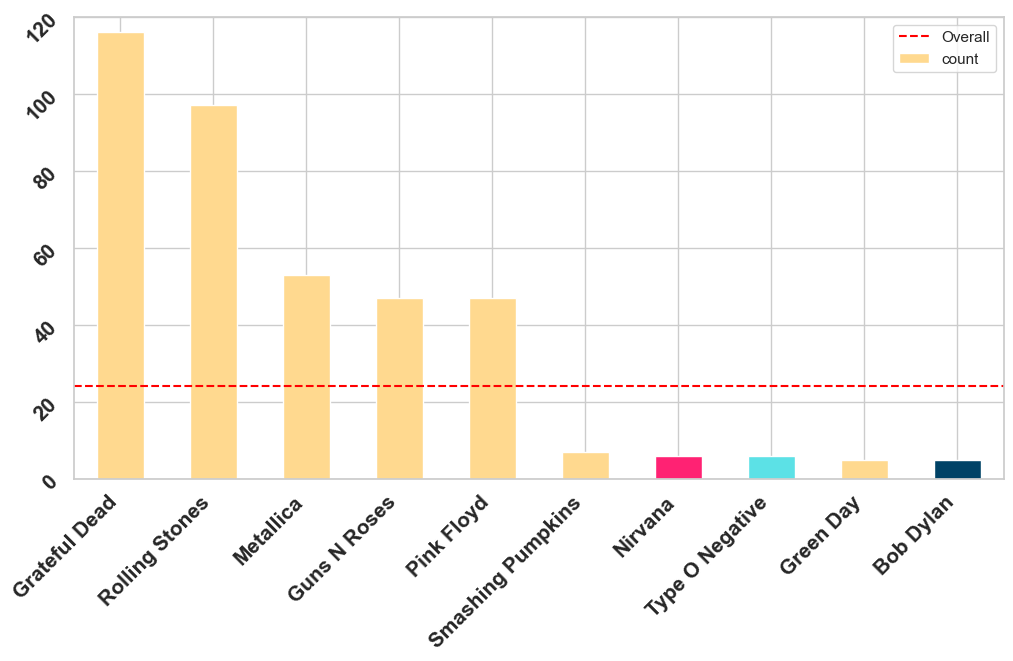

In [21]:
# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = artist_group_table.plot(kind='bar', color=rock_palette[1])
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=24, color='red', linestyle='--', label='Overall')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')


nirvana_index = artist_group_table.index.get_loc("Nirvana")
ax.patches[nirvana_index].set_facecolor("#FF2273") 

ton_index = artist_group_table.index.get_loc("Type O Negative")
ax.patches[ton_index].set_facecolor("#5CE1E6") 

bob_index = artist_group_table.index.get_loc("Bob Dylan")
ax.patches[bob_index].set_facecolor("#004266") 


plt.ylim(0, 120)  # Adjust the range as needed
plt.legend()  # Show legend
plt.savefig('images/bar_char_top&tail_avail_artist_color.png')
plt.show()

In [22]:
#TOP POR DECADA / PRECIO VENTA:

In [23]:
df_70 = df_music.query('decade == 1970')
df_80 = df_music.query('decade == 1980')
df_90 = df_music.query('decade == 1990')
df_00 = df_music.query('decade == 2000')

In [24]:
df_70_avg = pd.DataFrame(df_70.groupby(["tag"])['price_$'].mean())
df_80_avg = pd.DataFrame(df_80.groupby(["tag"])['price_$'].mean())
df_90_avg = pd.DataFrame(df_90.groupby(["tag"])['price_$'].mean())
df_00_avg = pd.DataFrame(df_00.groupby(["tag"])['price_$'].mean())

In [25]:
avg_table = pd.merge(group_avg_price, df_70_avg, on='tag', how="left")
avg_table.rename(columns={'price_$_x': 'tot_avg'}, inplace=True)
avg_table.rename(columns={'price_$_y': 'avg_70'}, inplace=True)
avg_table = pd.merge(avg_table, df_80_avg, on='tag', how="left")
avg_table.rename(columns={'price_$': 'avg_80'}, inplace=True)
avg_table = pd.merge(avg_table, df_90_avg, on='tag', how="left")
avg_table.rename(columns={'price_$': 'avg_90'}, inplace=True)
avg_table = pd.merge(avg_table, df_00_avg, on='tag', how="left")
avg_table.rename(columns={'price_$': 'avg_0'}, inplace=True)
avg_table.head(10)

,tot_avg,avg_70,avg_80,avg_90,avg_0
tag,,,,,
Iron Maiden,426.817308,NaN,458.013158,379.166667,120.00
Nine Inch Nails,421.428571,NaN,NaN,421.428571,NaN
Bob Dylan,390.000000,450.000000,NaN,150.000000,NaN
The Clash,376.666667,700.000000,339.583333,175.000000,NaN
Type O Negative,341.666667,NaN,NaN,433.333333,250.00
Ramones,338.157895,675.000000,387.500000,338.888889,118.75
Green Day,330.000000,NaN,NaN,466.666667,125.00
Guns N Roses,320.212766,NaN,342.045455,301.000000,NaN
Fleetwood Mac,318.225806,420.000000,223.571429,222.222222,NaN


###  RANKINGS

In [26]:
df_a.sort_values(by="Average Rating", ascending=False ).head(5)

,Average Rating,Decade,Artist Name,Album,Genres
12,4.34,1960,Mingus,The Black Saint and the Sinner Lady,"Avant-Garde Jazz, Third Stream"
2,4.30,1960,King Crimson,In the Court of the Crimson King,"Progressive Rock, Art Rock"
14,4.30,1960,John Coltrane,A Love Supreme,Spiritual Jazz
1,4.29,1970,Pink Floyd,Wish You Were Here,"Progressive Rock, Art Rock"
10,4.26,2000,Madvillain,Madvillainy,Abstract Hip Hop


It doesn't seem like they are the highest-rated albums, but if we take a closer look at the artists, all of them are in some way associated with the Rock category. That's why we're going to focus a bit more on this category for the analysis.

May be the connection between vintage T-shirts and music is not so much about the popularity or rating of the artists but rather about a specific aesthetic

In [27]:
rock_bands = df_a[df_a['Genres'].str.contains('Rock', case=False, regex=True)]
rock_bands = rock_bands[rock_bands["Decade"] != 1960]
rock_bands

,Average Rating,Decade,Artist Name,Album,Genres
0,4.23,1990,Radiohead,OK Computer,"Alternative Rock, Art Rock"
1,4.29,1970,Pink Floyd,Wish You Were Here,"Progressive Rock, Art Rock"
3,4.21,2000,Radiohead,Kid A,"Art Rock, Experimental Rock, Electronic"
5,4.20,1970,Pink Floyd,The Dark Side of the Moon,"Art Rock, Progressive Rock"
8,4.26,1970,David Bowie,The Rise and Fall of Ziggy Stardust and the Sp...,"Glam Rock, Pop Rock"
...,...,...,...,...,...
4431,3.67,2000,The Residents,Demons Dance Alone,"Art Pop, Experimental Rock"
4436,3.64,1990,The Flaming Lips,Transmissions From the Satellite Heart,"Noise Pop, Alternative Rock"
4439,3.68,1980,John Hiatt,Bring the Family,"Singer/Songwriter, Roots Rock, Americana"
4441,3.69,1970,Gracious,Gracious!,"Progressive Rock, Symphonic Prog"


In [28]:
rock_bands_avg = rock_bands['Average Rating'].mean()
rock_bands_avg

# Average price by decade
rock_bands_decades = pd.DataFrame(rock_bands.groupby(["Decade"])['Average Rating'].mean())


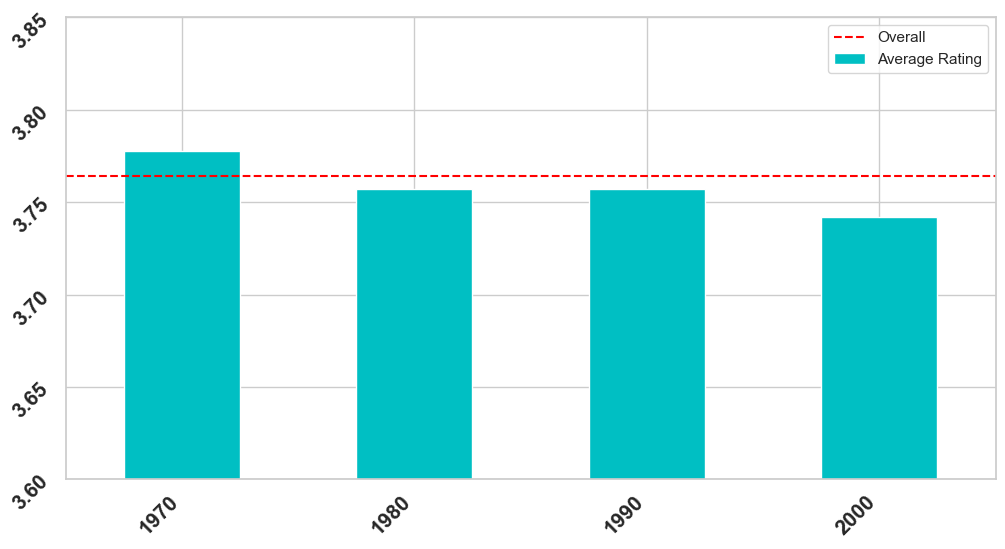

In [29]:

# Plot the bar chart with bold format, fontsize=15, and axes rotation
ax = rock_bands_decades.plot(kind='bar', color=rock_palette[4])
ax.set_xlabel("", fontsize=15, weight='bold', rotation=0, ha='right')  # Provide a meaningful xlabel if needed
ax.set_ylabel("")
ax.set_title('', fontsize=15, weight='bold')  # Provide a meaningful title if needed

# Overlay the line plot for overall average price
plt.axhline(y=rock_bands_avg, color='red', linestyle='--', label='Overall')

# Rotate the year labels on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=15, weight='bold')
plt.yticks(rotation=45, ha='right', fontsize=15, weight='bold')

plt.ylim(3.6, 3.85)

plt.legend()  # Show legend
plt.savefig('images/bar_char_rating_decade.png')

plt.show()

In [275]:
rock_bands_avg = rock_bands['Average Rating'].mean()
rock_bands_avg

rock_bands_rank = pd.DataFrame(rock_bands.groupby(["Decade"])['Average Rating'].mean())
rock_bands_rank

,Average Rating
Decade,
1960,3.805753
1970,3.777390
1980,3.757100
1990,3.757010
2000,3.741760


In [521]:
rock_bands_artists = pd.DataFrame(rock_bands.groupby(["Artist Name"])['Average Rating'].mean())

In [528]:
rock_bands_artists = rock_bands_artists.sort_values(by='Average Rating', ascending=False)
rock_bands_artists.head(10)

,Average Rating
Artist Name,
Fishmans,4.170
Slint,4.150
Godspeed You Black Emperor!,4.145
Television,4.130
The Stooges,4.090
Talk Talk,4.085
George Harrison,4.050
Creedence Clearwater Revival,4.040
Prince,4.030


In [523]:
df_60 = rock_bands.query('Decade == 1960')

In [518]:
df_70 = rock_bands.query('Decade == 1970')
df_70_avg = pd.DataFrame(df_70.groupby(["Artist Name"])['Average Rating'].mean())
df_70_avg = df_70_avg.sort_values(by='Average Rating', ascending=False)
df_70_avg

,Average Rating
Artist Name,
Television,4.130000
The Stooges,4.090000
George Harrison,4.050000
David Bowie,4.048333
Creedence Clearwater Revival,4.040000
...,...
Aerosmith,3.640000
Boston,3.630000
AC/DC,3.625000


In [510]:
df_80 = rock_bands.query('Decade == 1980')
#agrupar por artista en el orden de ranking. 
#estaria bien saber cuales son los albumes mas top
df_80_avg = pd.DataFrame(df_80.groupby(["Artist Name"])['Average Rating'].mean())
df_80_avg.head(5)

,Average Rating
Artist Name,
AC/DC,3.54
Agent Orange,3.74
Aqsak Maboul,3.68
Ashbury,3.76
Bacamarte,3.73


In [511]:
df_90 = rock_bands.query('Decade == 1990')
#agrupar por artista en el orden de ranking. 
#estaria bien saber cuales son los albumes mas top
df_90_avg = pd.DataFrame(df_90.groupby(["Artist Name"])['Average Rating'].mean())
df_90_avg.head(5)

,Average Rating
Artist Name,
12 Rods,3.730
Acrimony,3.710
After Crying,3.690
Aimee Mann,3.750
Anathema,3.735


In [512]:
df_00 = rock_bands.query('Decade == 2000')
#agrupar por artista en el orden de ranking. 
#estaria bien saber cuales son los albumes mas top
df_00_avg = pd.DataFrame(df_00.groupby(["Artist Name"])['Average Rating'].mean())
df_00_avg.head(5)

,Average Rating
Artist Name,
...And You Will Know Us by the Trail of Dead,3.66
A Silver Mt. Zion,3.76
Aimee Mann,3.72
Alain Bashung,3.67
Anathema,3.68


In [269]:
rock_bands.sort_values(by="Average Rating", ascending=False ).head(10)

,Average Rating,Decade,Artist Name,Album,Genres
2,4.30,1960,King Crimson,In the Court of the Crimson King,"Progressive Rock, Art Rock"
1,4.29,1970,Pink Floyd,Wish You Were Here,"Progressive Rock, Art Rock"
8,4.26,1970,David Bowie,The Rise and Fall of Ziggy Stardust and the Sp...,"Glam Rock, Pop Rock"
6,4.25,1960,The Beatles,Abbey Road,Pop Rock
0,4.23,1990,Radiohead,OK Computer,"Alternative Rock, Art Rock"
7,4.23,1960,The Velvet Underground & Nico,The Velvet Underground & Nico,"Art Rock, Experimental Rock"
9,4.23,1960,The Beatles,Revolver,"Pop Rock, Psychedelic Pop"
22,4.21,1970,King Crimson,Red,"Progressive Rock, Art Rock"
3,4.21,2000,Radiohead,Kid A,"Art Rock, Experimental Rock, Electronic"
5,4.20,1970,Pink Floyd,The Dark Side of the Moon,"Art Rock, Progressive Rock"


In [280]:
rock_bands

,Average Rating,Decade,Artist Name,Album,Genres
0,4.23,1990,Radiohead,OK Computer,"Alternative Rock, Art Rock"
1,4.29,1970,Pink Floyd,Wish You Were Here,"Progressive Rock, Art Rock"
2,4.30,1960,King Crimson,In the Court of the Crimson King,"Progressive Rock, Art Rock"
3,4.21,2000,Radiohead,Kid A,"Art Rock, Experimental Rock, Electronic"
5,4.20,1970,Pink Floyd,The Dark Side of the Moon,"Art Rock, Progressive Rock"
...,...,...,...,...,...
4431,3.67,2000,The Residents,Demons Dance Alone,"Art Pop, Experimental Rock"
4436,3.64,1990,The Flaming Lips,Transmissions From the Satellite Heart,"Noise Pop, Alternative Rock"
4439,3.68,1980,John Hiatt,Bring the Family,"Singer/Songwriter, Roots Rock, Americana"
4441,3.69,1970,Gracious,Gracious!,"Progressive Rock, Symphonic Prog"
